In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Zomato_data.csv")

In [33]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [35]:
def rateclean(i):
    i=str(i).split('/')
    i=i[0]
    return float(i)
df['rate']=df['rate'].apply(rateclean)

In [36]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


# q1

Text(0.5, 0, 'Type of restaurants')

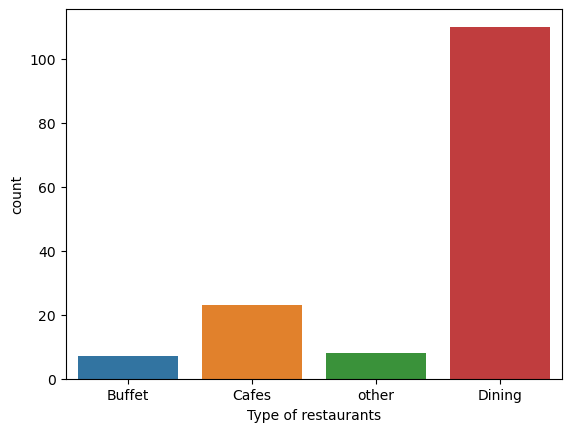

In [58]:
sns.countplot(x= df['listed_in(type)'])
plt.xlabel("Type of restaurants")

# q2

Text(0, 0.5, 'Total Votes')

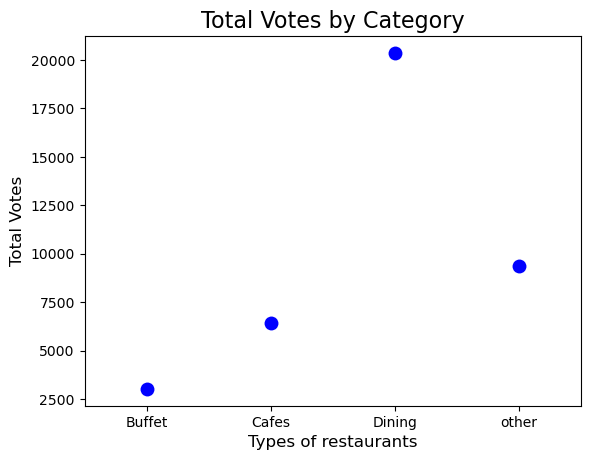

In [59]:
group=df.groupby('listed_in(type)')['votes'].sum()
#result=pd.DataFrame({'votes':group})
result = group.reset_index(name='votes')
sns.stripplot(data=result, x='listed_in(type)', y='votes', size=10,color='blue')# Add titles and labels
plt.title('Total Votes by Category', fontsize=16)
plt.xlabel('Types of restaurants', fontsize=12)
plt.ylabel('Total Votes', fontsize=12)

# q3

Text(0.5, 1.0, 'Rating')

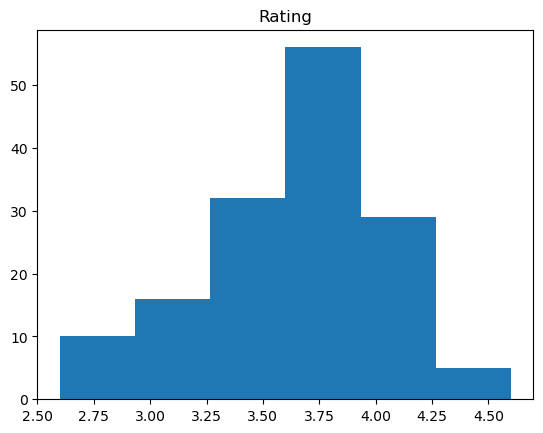

In [61]:
plt.hist(df['rate'], bins=6)
plt.title("Rating")

# q4

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

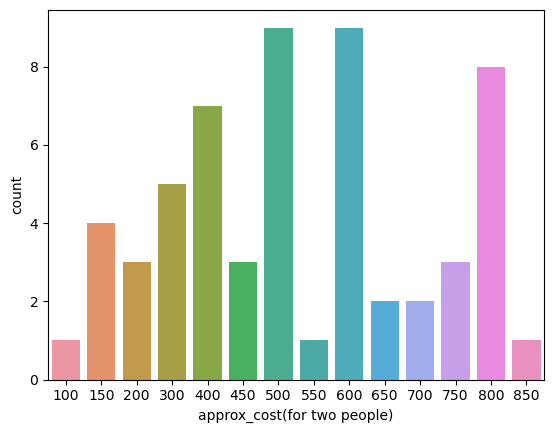

In [67]:
filter_order=df[df['online_order']== "Yes"]
price=filter_order['approx_cost(for two people)']
sns.countplot(x=price)

In [68]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


# q5

<Axes: xlabel='online_order', ylabel='rate'>

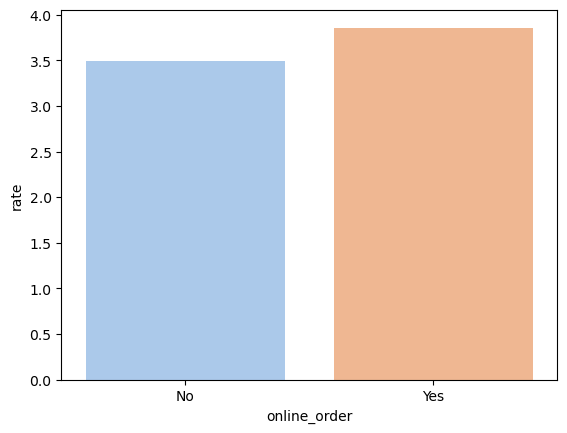

In [82]:
rating = df.groupby('online_order')['rate'].mean().reset_index()
sns.barplot(data=rating, x='online_order', y='rate', palette='pastel')

<Axes: xlabel='online_order', ylabel='rate'>

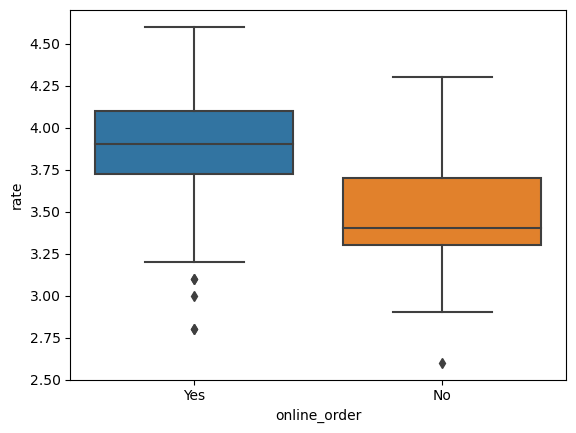

In [99]:
#or

sns.boxplot(x='online_order',y='rate', data=df)

# q6

Text(0, 0.5, 'Number of Offline Orders')

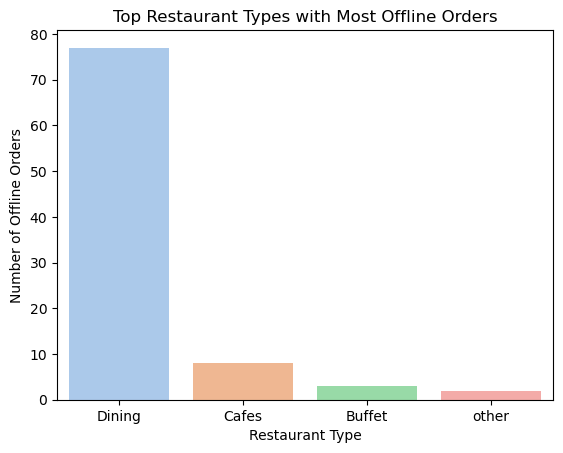

In [97]:
offline_orders = df[df['online_order'] == "No"]

# Group by Restaurant Type and count orders
offline_counts = offline_orders['listed_in(type)'].value_counts()

sns.barplot(x=offline_counts.index, y=offline_counts.values, palette='pastel')

plt.title('Top Restaurant Types with Most Offline Orders')
plt.xlabel('Restaurant Type')
plt.ylabel('Number of Offline Orders')

<Axes: xlabel='online_order', ylabel='listed_in(type)'>

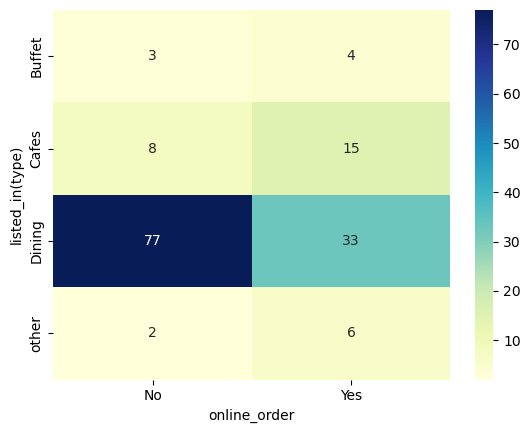

In [100]:
# or
# Create a Pivot Table: Count of orders by Restaurant Type
heatmap_data = df.pivot_table(
    index='listed_in(type)',
    columns='online_order',
    aggfunc='size',
    fill_value=0
)
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')

# q7

  listed_in(type) online_order  Total Orders
0          Buffet           No             3
1          Buffet          Yes             4
2           Cafes           No             8
3           Cafes          Yes            15
4          Dining           No            77


Text(0, 0.5, 'Number of Orders')

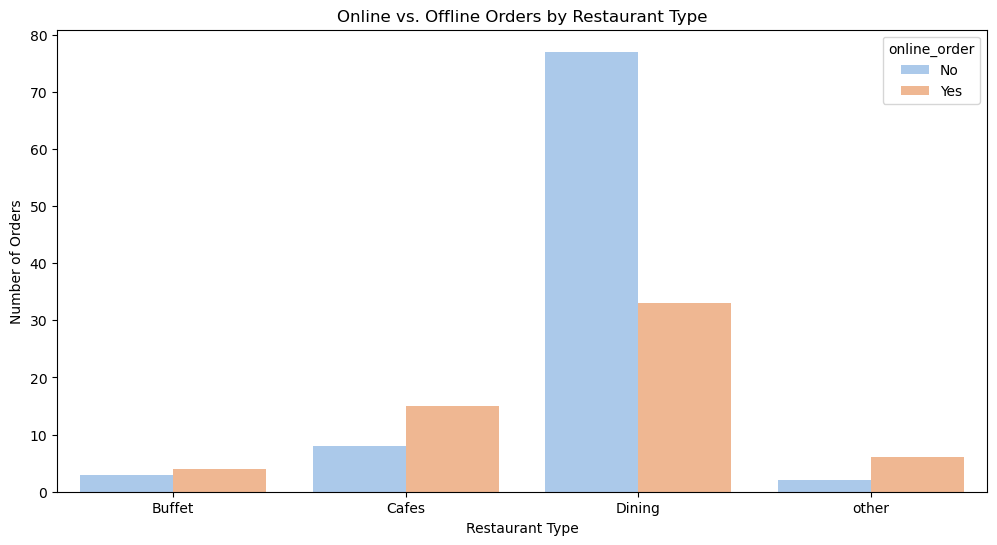

In [98]:
order_counts = df.groupby(['listed_in(type)', 'online_order']).size().reset_index(name='Total Orders')
print(order_counts.head())
sns.barplot(data=order_counts, x='listed_in(type)', y='Total Orders', hue='online_order', palette='pastel')
plt.title('Online vs. Offline Orders by Restaurant Type')
plt.xlabel('Restaurant Type')
plt.ylabel('Number of Orders')